# KAPLAN-MEIER SURVIVAL PLOTS FOR MEDOMICS FEATURES

## DESCRIPTION
In this notebook, the graphics inserted in Figure 4 of the paper "MEDomics: Towards Self-Cognizant Hospitals in the Treatment of Cancer" are obtained. Figure 4 is dedicated to provide some examples of Kaplan-Meier survival plots for MEDomics features on selected breast and lung cancer patients. 

Graphics are organized as:
* A) Patient survival divided by staging groups:  stage 0-2, stage 3 and  stage 4.
* B) Patient survival divided by the 12 astrological zodiac signs.
* C) Patient survival (stage 4 only) for patients that were prescribed targeted drug (breast) and immunotherapy drugs (lung).
* D) Patient survival stratified by stage and for a Framingham risk score threshold of 0.3.
* E) Patient survival stratified by stage for patients with current or previous history of tobacco usage. 

## STATEMENT
 This file is part of <https://github.com/medomics>, a package providing 
 research utility tools for developing precision medicine applications.
 
 --> Copyright (C) 2020  MEDomics consortium

     This package is free software: you can redistribute it and/or modify
     it under the terms of the GNU General Public License as published by
     the Free Software Foundation, either version 3 of the License, or
     (at your option) any later version.

     This package is distributed in the hope that it will be useful,
     but WITHOUT ANY WARRANTY; without even the implied warranty of
     MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
     GNU General Public License for more details.
 
     You should have received a copy of the GNU General Public License
     along with this package.  If not, see <http://www.gnu.org/licenses/>.

## IMPORTS

In [2]:
## Run twice to avoid the error.
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.lines import Line2D
from lifelines import KaplanMeierFitter as KM
from lifelines.statistics import logrank_test
import warnings
warnings.filterwarnings("ignore") # Ignore warnings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## LOAD DATA

In [3]:
# Read pickle objects from the Data folder.

df_breast = pd.read_pickle("./Data/df_breast_Fig4.pkl")
df_lung = pd.read_pickle("./Data/df_lung_Fig4.pkl")

## DEFINE FUNCTIONS

In [4]:
def survival_plot_2G_2DF(df_string ,string_eval='',label_string1 = '',
                         df_string2 = None, string_eval2='',label_string2 = '',title_string='',x_max=5.5,legend = True, immu=False):
    # df_string : string containing the dataframe name
    # string_eval: string with the others conditions
    # title_string: title

    exec("Stage0 = "+df_string+"[("+df_string+"['ctnmstagegroup_2G']=='0-3')"+ string_eval +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage4 = "+df_string+"[("+df_string+"['ctnmstagegroup_2G']=='4')"+ string_eval +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage0_2 = "+df_string+"[("+df_string2+"['ctnmstagegroup_2G']=='0-3')"+ string_eval2 +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage4_2 = "+df_string+"[("+df_string2+"['ctnmstagegroup_2G']=='4')"+ string_eval2 +"].sort_values('overallsurvival', ascending=True)", globals())


    exec("T = "+df_string+"['overallsurvival']", globals())
    exec("E = "+df_string+"['vitalstatusbinary']", globals())
    exec("T2 = "+df_string2+"['overallsurvival']", globals())
    exec("E2 = "+df_string2+"['vitalstatusbinary']", globals())
 
    
    total_to_show = len(Stage0)+len(Stage4)+len(Stage0_2)+len(Stage4_2)
    
    if total_to_show:
        f = plt.figure()
        kmf = KM()
        ax_flag = False

        if len(Stage4):
            p = add_p(T[Stage4.index],T2[Stage4_2.index],E[Stage4.index],E2[Stage4_2.index])
            kmf.fit(T[Stage4.index], event_observed=E[Stage4.index], label=label_string1+', n='+str(len(Stage4)) +p)
            if ax_flag:
                ax = kmf.survival_function_.plot(ax=ax,color='red',linewidth=2)
            else:
                ax = kmf.survival_function_.plot(color='red',linewidth=2)
                ax_flag = True
        if len(Stage4_2):
            kmf.fit(T2[Stage4_2.index], event_observed=E2[Stage4_2.index], label=label_string2+', n='+str(len(Stage4_2)) )
            if ax_flag:
                ax = kmf.survival_function_.plot(ax=ax,color='red',linewidth=2, linestyle='dashed')
            else:
                ax = kmf.survival_function_.plot(color='red',linewidth=2)                

        kmf.survival_function_
        kmf.median_
        title_out = str(total_to_show) +' '+ title_string+' Survival'
        #plt.title(str(total_to_show) +' '+ title_string+' Survival')
        plt.ylim(0, 1);
        plt.xlabel('Time in Years')
        plt.ylabel('Surviving Fraction')
        plt.grid(True)
        plt.axis([0, x_max, 0, 1])
        plt.xticks(np.arange(0, x_max, step=1))
        plt.yticks(np.arange(0, 1.1, step=0.1))
        
        if not legend:
            #plt.gca().legend_.remove()
            custom_lines = [Line2D([0], [0], color='red', lw=2, ls='dashed'),
                            Line2D([0], [0], color='red', lw=2)]
            
            if immu:
                plt.legend(custom_lines, ['Stage 4 - With Immunotherapy', 'Stage 4 - No Immunotherapy'])
                plt.text(2.2, .35, p, color='red')
            else:
                plt.legend(custom_lines, ['Stage 4 - With Targeted Therapy', 'Stage 4 - No Targeted Therapy'])
                plt.text(2.9, .63, p, color='red')
        os.makedirs('eps', 0o777, True)
        plt.savefig('./eps/'+title_out+str(legend)+'.eps', format='eps')
 
    else:
        print('No cases to show!')
        
        

In [5]:
def survival_plot_3G_2DF_Smoker(df_string ,string_eval='',label_string1 = '',
                         df_string2 = None, string_eval2='',label_string2 = '',title_string='',x_max=5.5,legend = True,lung=False):
    # df_string : string containing the dataframe name
    # string_eval: string with the others conditions
    # title_string: title

    exec("Stage0 = "+df_string+"[("+df_string+"['ctnmstagegroup_3G']=='0-2')"+ string_eval +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage3 = "+df_string+"[("+df_string+"['ctnmstagegroup_3G']=='3')"+ string_eval +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage4 = "+df_string+"[("+df_string+"['ctnmstagegroup_3G']=='4')"+ string_eval +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage0_2 = "+df_string+"[("+df_string2+"['ctnmstagegroup_3G']=='0-2')"+ string_eval2 +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage3_2 = "+df_string+"[("+df_string2+"['ctnmstagegroup_3G']=='3')"+ string_eval2 +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage4_2 = "+df_string+"[("+df_string2+"['ctnmstagegroup_3G']=='4')"+ string_eval2 +"].sort_values('overallsurvival', ascending=True)", globals())

    exec("T = "+df_string+"['overallsurvival']", globals())
    exec("E = "+df_string+"['vitalstatusbinary']", globals())
    exec("T2 = "+df_string2+"['overallsurvival']", globals())
    exec("E2 = "+df_string2+"['vitalstatusbinary']", globals())
 
    
    total_to_show = len(Stage0)+len(Stage3)+len(Stage4)+len(Stage0_2)+len(Stage3_2)+len(Stage4_2)
    
    if total_to_show:
        f = plt.figure()
        kmf = KM()
        ax_flag = False

        if len(Stage0):
            p0 = add_p(T[Stage0.index],T2[Stage0_2.index],E[Stage0.index],E2[Stage0_2.index])
            kmf.fit(T[Stage0.index], event_observed=E[Stage0.index], label=label_string1 + 'Stage 0-2, n='+str(len(Stage0))+p0)  # or, more succinctly, kmf.fit(T, E)
            ax = kmf.survival_function_.plot(color='blue',linewidth=2)
            ax_flag = True
        if len(Stage3):
            p3 = add_p(T[Stage3.index],T2[Stage3_2.index],E[Stage3.index],E2[Stage3_2.index])
            kmf.fit(T[Stage3.index], event_observed=E[Stage3.index], label=label_string1 +'Stage 3, n='+str(len(Stage3))+p3)
            if ax_flag:
                ax = kmf.survival_function_.plot(ax=ax,color='black',linewidth=2)
            else:
                ax = kmf.survival_function_.plot(color='black',linewidth=2)
                ax_flag = True    
        if len(Stage4):
            p4 = add_p(T[Stage4.index],T2[Stage4_2.index],E[Stage4.index],E2[Stage4_2.index])
            kmf.fit(T[Stage4.index], event_observed=E[Stage4.index], label=label_string1 +'Stage 4, n='+str(len(Stage4))+p4)
            if ax_flag:
                ax = kmf.survival_function_.plot(ax=ax,color='red',linewidth=2)
            else:
                ax = kmf.survival_function_.plot(color='red',linewidth=2)
                ax_flag = True
        if len(Stage0_2):
            kmf.fit(T2[Stage0_2.index], event_observed=E2[Stage0_2.index], label=label_string2 + 'Stage 0-2, n='+str(len(Stage0_2))) 
            if ax_flag:
                ax = kmf.survival_function_.plot(ax=ax,color='blue', linewidth=2, linestyle='dashed')
            else:
                ax = kmf.survival_function_.plot(color='blue', linewidth=2, linestyle='dashed')
                ax_flag = True
        if len(Stage3_2):
            kmf.fit(T2[Stage3_2.index], event_observed=E2[Stage3_2.index], label=label_string2 + 'Stage 3, n='+str(len(Stage3_2))) 
            if ax_flag:
                ax = kmf.survival_function_.plot(ax=ax,color='black', linewidth=2, linestyle='dashed')
            else:
                ax = kmf.survival_function_.plot(color='black', linewidth=2, linestyle='dashed')
                ax_flag = True        
        if len(Stage4_2):
            kmf.fit(T2[Stage4_2.index], event_observed=E2[Stage4_2.index], label=label_string2 +'Stage 4, n='+str(len(Stage4_2)))
            if ax_flag:
                ax = kmf.survival_function_.plot(ax=ax,color='red', linewidth=2, linestyle='dashed')
            else:
                ax = kmf.survival_function_.plot(color='red', linewidth=2, linestyle='dashed')
                

        kmf.survival_function_
        kmf.median_
        title_out = str(total_to_show) +' '+ title_string+' Survival'
        #plt.title(str(total_to_show) +' '+ title_string+' Survival') #  from Initial Diagnosis
        plt.ylim(0, 1);
        plt.xlabel('Time in Years')
        plt.ylabel('Surviving Fraction')
        plt.grid(True)
        plt.axis([0, x_max, 0, 1])
        plt.xticks(np.arange(0, x_max, step=1))
        plt.yticks(np.arange(0, 1.1, step=0.1))

        if not legend:
            #plt.gca().legend_.remove()
            custom_lines = [Line2D([0], [0], color='gray', lw=2, ls='dashed'),
                            Line2D([0], [0], color='gray', lw=2)]
            
            plt.legend(custom_lines, ['Current/Former Smoker', 'Never Smoker'])
            
            if lung:
                plt.text(3.2, .6, p0, color='blue')
                plt.text(3.8, .4, p3, color='black')
                plt.text(1.3, .22, p4, color='red')
            else:
                plt.text(2.5, .51, p4, color='red')
                plt.text(3.8, .67, p3, color='black')
                plt.text(4.2, .85, p0, color='blue')
        os.makedirs('eps', 0o777, True)
        plt.savefig('./eps/'+title_out+str(legend)+'.eps', format='eps')
    else:
        print('No cases to show!')
        
        

In [6]:
def survival_plot_3G_2DF(df_string ,string_eval='',label_string1 = '',
                         df_string2 = None, string_eval2='',label_string2 = '',title_string='',x_max=5.5,legend = True, lung=False):
    # df_string : string containing the dataframe name
    # string_eval: string with the others conditions
    # title_string: title

    exec("Stage0 = "+df_string+"[("+df_string+"['ctnmstagegroup_3G']=='0-2')"+ string_eval +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage3 = "+df_string+"[("+df_string+"['ctnmstagegroup_3G']=='3')"+ string_eval +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage4 = "+df_string+"[("+df_string+"['ctnmstagegroup_3G']=='4')"+ string_eval +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage0_2 = "+df_string+"[("+df_string2+"['ctnmstagegroup_3G']=='0-2')"+ string_eval2 +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage3_2 = "+df_string+"[("+df_string2+"['ctnmstagegroup_3G']=='3')"+ string_eval2 +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage4_2 = "+df_string+"[("+df_string2+"['ctnmstagegroup_3G']=='4')"+ string_eval2 +"].sort_values('overallsurvival', ascending=True)", globals())

    exec("T = "+df_string+"['overallsurvival']", globals())
    exec("E = "+df_string+"['vitalstatusbinary']", globals())
    exec("T2 = "+df_string2+"['overallsurvival']", globals())
    exec("E2 = "+df_string2+"['vitalstatusbinary']", globals())
 
    
    total_to_show = len(Stage0)+len(Stage3)+len(Stage4)+len(Stage0_2)+len(Stage3_2)+len(Stage4_2)
    
    if total_to_show:
        f = plt.figure()
        kmf = KM()
        ax_flag = False

        if len(Stage0):
            p0 = add_p(T[Stage0.index],T2[Stage0_2.index],E[Stage0.index],E2[Stage0_2.index])
            kmf.fit(T[Stage0.index], event_observed=E[Stage0.index], label=label_string1 + 'Stage 0-2, n='+str(len(Stage0))+p0) 
            ax = kmf.survival_function_.plot(color='blue',linewidth=2, linestyle='dashed')
            ax_flag = True
        if len(Stage3):
            p3 = add_p(T[Stage3.index],T2[Stage3_2.index],E[Stage3.index],E2[Stage3_2.index])
            kmf.fit(T[Stage3.index], event_observed=E[Stage3.index], label=label_string1 +'Stage 3, n='+str(len(Stage3))+p3)
            if ax_flag:
                ax = kmf.survival_function_.plot(ax=ax,color='black',linewidth=2, linestyle='dashed')
            else:
                ax = kmf.survival_function_.plot(color='black',linewidth=2, linestyle='dashed')
                ax_flag = True    
        if len(Stage4):
            p4 = add_p(T[Stage4.index],T2[Stage4_2.index],E[Stage4.index],E2[Stage4_2.index])
            kmf.fit(T[Stage4.index], event_observed=E[Stage4.index], label=label_string1 +'Stage 4, n='+str(len(Stage4))+p4)
            if ax_flag:
                ax = kmf.survival_function_.plot(ax=ax,color='red',linewidth=2, linestyle='dashed')
            else:
                ax = kmf.survival_function_.plot(color='red',linewidth=2, linestyle='dashed')
                ax_flag = True
        if len(Stage0_2):
            kmf.fit(T2[Stage0_2.index], event_observed=E2[Stage0_2.index], label=label_string2 + 'Stage 0-2, n='+str(len(Stage0_2)))  
            if ax_flag:
                ax = kmf.survival_function_.plot(ax=ax,color='blue', linewidth=2)
            else:
                ax = kmf.survival_function_.plot(color='blue', linewidth=2)
                ax_flag = True
        if len(Stage3_2):
            kmf.fit(T2[Stage3_2.index], event_observed=E2[Stage3_2.index], label=label_string2 + 'Stage 3, n='+str(len(Stage3_2)))  
            if ax_flag:
                ax = kmf.survival_function_.plot(ax=ax,color='black', linewidth=2)
            else:
                ax = kmf.survival_function_.plot(color='black', linewidth=2)
                ax_flag = True        
        if len(Stage4_2):
            kmf.fit(T2[Stage4_2.index], event_observed=E2[Stage4_2.index], label=label_string2 +'Stage 4, n='+str(len(Stage4_2)))
            if ax_flag:
                ax = kmf.survival_function_.plot(ax=ax,color='red', linewidth=2)
            else:
                ax = kmf.survival_function_.plot(color='red', linewidth=2)
                

        kmf.survival_function_
        kmf.median_
        title_out = str(total_to_show) +' '+ title_string+' Survival'
        #plt.title(str(total_to_show) +' '+ title_string+' Survival') #  from Initial Diagnosis
        plt.ylim(0, 1);
        plt.xlabel('Time in Years')
        plt.ylabel('Surviving Fraction')
        plt.grid(True)
        plt.axis([0, x_max, 0, 1])
        plt.xticks(np.arange(0, x_max, step=1))
        plt.yticks(np.arange(0, 1.1, step=0.1))

        if not legend:
            #plt.gca().legend_.remove()
            custom_lines = [Line2D([0], [0], color='gray', lw=2, ls='dashed'),
                            Line2D([0], [0], color='gray', lw=2)]
            
            plt.legend(custom_lines, ['Framingham risk > 0.3', 'Framingham risk <= 0.3'])
            
            if lung:
                plt.text(4.5, .8, p0, color='blue')
                plt.text(3.8, .39, p3, color='black')
                plt.text(3.4, .1, p4, color='red')
            else:
                plt.text(2.6, .55, p4, color='red')
                plt.text(3.6, .73, p3, color='black')
                plt.text(3.6, .87, p0, color='blue')
        os.makedirs('eps', 0o777, True)
        plt.savefig('./eps/'+title_out+str(legend)+'.eps', format='eps')
    else:
        print('No cases to show!')
        
        

In [7]:
def survival_plot_3G(df_string,string_eval='',title_string='',x_max=5.5,legend = True): #string_eval ="" 
    # df_string : string containing the dataframe name
    # string_eval: string with the others conditions
    # title_string: title

    exec("Stage0 = "+df_string+"[("+df_string+"['ctnmstagegroup_3G']=='0-2')"+ string_eval +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage3 = "+df_string+"[("+df_string+"['ctnmstagegroup_3G']=='3')"+ string_eval +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("Stage4 = "+df_string+"[("+df_string+"['ctnmstagegroup_3G']=='4')"+ string_eval +"].sort_values('overallsurvival', ascending=True)", globals())
    exec("T = "+df_string+"['overallsurvival']", globals())
    exec("E = "+df_string+"['vitalstatusbinary']", globals())
        
    total_to_show = len(Stage0)+len(Stage3)+len(Stage4)
    
    if total_to_show:
        f = plt.figure()
        kmf = KM()
        ax_flag = False

        if len(Stage0):
            kmf.fit(T[Stage0.index], event_observed=E[Stage0.index], label='Stage 0-2, n='+str(len(Stage0)))
            ax = kmf.survival_function_.plot(color='blue',linewidth=2)
            ax_flag = True
        if len(Stage3):
            kmf.fit(T[Stage3.index], event_observed=E[Stage3.index], label='Stage 3, n='+str(len(Stage3)))
            if ax_flag:
                ax = kmf.survival_function_.plot(ax=ax,color='black',linewidth=2)
            else:
                ax = kmf.survival_function_.plot(color='black',linewidth=2)
                ax_flag = True
        if len(Stage4):
            kmf.fit(T[Stage4.index], event_observed=E[Stage4.index], label='Stage 4, n='+str(len(Stage4)))
            if ax_flag:
                ax = kmf.survival_function_.plot(ax=ax,color='red',linewidth=2)
            else:
                ax = kmf.survival_function_.plot(color='red',linewidth=2)

        kmf.survival_function_
        kmf.median_
        title_out = str(total_to_show) +' '+ title_string+' Survival'
        #plt.title(str(total_to_show) +' '+ title_string+' Survival') #  from Initial Diagnosis
        plt.ylim(0, 1);
        plt.xlabel('Time in Years')
        plt.ylabel('Surviving Fraction')
        plt.grid(True)
        plt.axis([0, x_max, 0, 1])
        plt.xticks(np.arange(0, x_max, step=1))
        plt.yticks(np.arange(0, 1.1, step=0.1))
        

        if not legend:
            plt.gca().legend_.remove()
        os.makedirs('eps', 0o777, True)
        plt.savefig('./eps/'+title_out+str(legend)+'.eps', format='eps')
    else:
        print('No cases to show!')

In [8]:
def add_p(t_1,t_2,E_1,E_2):
    # Compute p-value between two curves
    p = logrank_test(t_1.astype(float), t_2.astype(float),
                         event_observed_A=E_1.astype(float),
                         event_observed_B=E_2.astype(float)).p_value

    if p < 0.0001:
        return ' P < 0.0001'
    else: 
        return ' P = '+str(max(0.0001,round(p, 3)))

## PLOT RESULTS

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

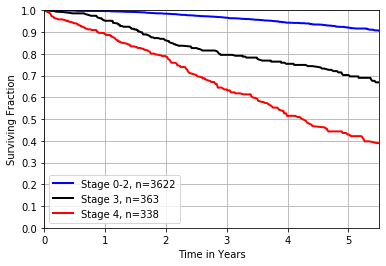

<Figure size 432x288 with 0 Axes>

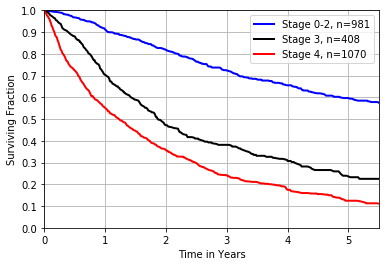

In [9]:
# Survival plots for selected breast and lung patients from time of initial diagnosis.
# A.) Patient survival divided by staging groups: blue – stage 0-2, black – stage 3 and red – stage 4

survival_plot_3G(df_string = 'df_breast', title_string="Breast Cancer 3G")

survival_plot_3G(df_string = 'df_lung', title_string="Lung Cancer 3G")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

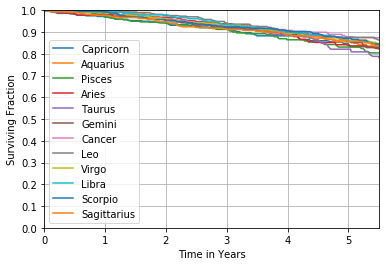

In [10]:
# Survival plots for selected breast patients from time of initial diagnosis.
# B. Patient survival divided by the 12 astrological zodiac signs

Capricorn = df_breast[df_breast['zodiacsign'].isin(['Capricorn'])] \
.sort_values('overallsurvival', ascending=True)

Aquarius = df_breast[df_breast['zodiacsign'].isin(['Aquarius'])] \
.sort_values('overallsurvival', ascending=True)

Pisces = df_breast[df_breast['zodiacsign'].isin(['Pisces'])] \
.sort_values('overallsurvival', ascending=True)

Aries = df_breast[df_breast['zodiacsign'].isin(['Aries'])] \
.sort_values('overallsurvival', ascending=True)

Taurus = df_breast[df_breast['zodiacsign'].isin(['Taurus'])] \
.sort_values('overallsurvival', ascending=True)

Gemini = df_breast[df_breast['zodiacsign'].isin(['Gemini'])] \
.sort_values('overallsurvival', ascending=True)

Cancer = df_breast[df_breast['zodiacsign'].isin(['Cancer'])] \
.sort_values('overallsurvival', ascending=True)

Leo = df_breast[df_breast['zodiacsign'].isin(['Leo'])] \
.sort_values('overallsurvival', ascending=True)

Virgo = df_breast[df_breast['zodiacsign'].isin(['Virgo'])] \
.sort_values('overallsurvival', ascending=True)

Libra = df_breast[df_breast['zodiacsign'].isin(['Libra'])] \
.sort_values('overallsurvival', ascending=True)

Scorpio = df_breast[df_breast['zodiacsign'].isin(['Scorpio'])] \
.sort_values('overallsurvival', ascending=True)

Sagittarius = df_breast[df_breast['zodiacsign'].isin(['Sagittarius'])] \
.sort_values('overallsurvival', ascending=True)

T = df_breast['overallsurvival'].copy()
E = df_breast['vitalstatusbinary'].copy()

f = plt.figure()
kmf = KM()

kmf.fit(T[Capricorn.index], event_observed=E[Capricorn.index], label='Capricorn')
ax = kmf.survival_function_.plot()

kmf.fit(T[Aquarius.index], event_observed=E[Aquarius.index], label='Aquarius')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Pisces.index], event_observed=E[Pisces.index], label='Pisces')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Aries.index], event_observed=E[Aries.index], label='Aries')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Taurus.index], event_observed=E[Taurus.index], label='Taurus')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Gemini.index], event_observed=E[Gemini.index], label='Gemini')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Cancer.index], event_observed=E[Cancer.index], label='Cancer')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Leo.index], event_observed=E[Leo.index], label='Leo')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Virgo.index], event_observed=E[Virgo.index], label='Virgo')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Libra.index], event_observed=E[Libra.index], label='Libra')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Scorpio.index], event_observed=E[Scorpio.index], label='Scorpio')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Sagittarius.index], event_observed=E[Sagittarius.index], label='Sagittarius')
ax = kmf.survival_function_.plot(ax=ax)

kmf.survival_function_
kmf.median_
#plt.title('Breast Cancer Survival from Initial Diagnosis')
plt.ylim(0, 1);
plt.xlabel('Time in Years')
plt.ylabel('Surviving Fraction')
plt.grid(True)
plt.axis([0, 5.5, 0, 1])
plt.xticks(np.arange(0, 5.5, step=1))
plt.yticks(np.arange(0, 1.1, step=0.1))
os.makedirs('eps', 0o777, True)
plt.savefig('./eps/'+'Breast-Zodiac-2.eps', format='eps')



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

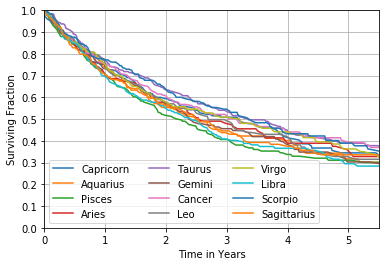

In [11]:
# Survival plots for selected lung patients from time of initial diagnosis.
# B. Patient survival divided by the 12 astrological zodiac signs

Capricorn = df_lung[df_lung['zodiacsign'].isin(['Capricorn'])] \
.sort_values('overallsurvival', ascending=True)

Aquarius = df_lung[df_lung['zodiacsign'].isin(['Aquarius'])] \
.sort_values('overallsurvival', ascending=True)

Pisces = df_lung[df_lung['zodiacsign'].isin(['Pisces'])] \
.sort_values('overallsurvival', ascending=True)

Aries = df_lung[df_lung['zodiacsign'].isin(['Aries'])] \
.sort_values('overallsurvival', ascending=True)

Taurus = df_lung[df_lung['zodiacsign'].isin(['Taurus'])] \
.sort_values('overallsurvival', ascending=True)

Gemini = df_lung[df_lung['zodiacsign'].isin(['Gemini'])] \
.sort_values('overallsurvival', ascending=True)

Cancer = df_lung[df_lung['zodiacsign'].isin(['Cancer'])] \
.sort_values('overallsurvival', ascending=True)

Leo = df_lung[df_lung['zodiacsign'].isin(['Leo'])] \
.sort_values('overallsurvival', ascending=True)

Virgo = df_lung[df_lung['zodiacsign'].isin(['Virgo'])] \
.sort_values('overallsurvival', ascending=True)

Libra = df_lung[df_lung['zodiacsign'].isin(['Libra'])] \
.sort_values('overallsurvival', ascending=True)

Scorpio = df_lung[df_lung['zodiacsign'].isin(['Scorpio'])] \
.sort_values('overallsurvival', ascending=True)

Sagittarius = df_lung[df_lung['zodiacsign'].isin(['Sagittarius'])] \
.sort_values('overallsurvival', ascending=True)

T = df_lung['overallsurvival'].copy()
E = df_lung['vitalstatusbinary'].copy()

f = plt.figure()
kmf = KM()

kmf.fit(T[Capricorn.index], event_observed=E[Capricorn.index], label='Capricorn')
ax = kmf.survival_function_.plot()

kmf.fit(T[Aquarius.index], event_observed=E[Aquarius.index], label='Aquarius')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Pisces.index], event_observed=E[Pisces.index], label='Pisces')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Aries.index], event_observed=E[Aries.index], label='Aries')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Taurus.index], event_observed=E[Taurus.index], label='Taurus')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Gemini.index], event_observed=E[Gemini.index], label='Gemini')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Cancer.index], event_observed=E[Cancer.index], label='Cancer')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Leo.index], event_observed=E[Leo.index], label='Leo')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Virgo.index], event_observed=E[Virgo.index], label='Virgo')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Libra.index], event_observed=E[Libra.index], label='Libra')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Scorpio.index], event_observed=E[Scorpio.index], label='Scorpio')
ax = kmf.survival_function_.plot(ax=ax)

kmf.fit(T[Sagittarius.index], event_observed=E[Sagittarius.index], label='Sagittarius')
ax = kmf.survival_function_.plot(ax=ax)

kmf.survival_function_
kmf.median_
#plt.title('Lung Cancer Survival from Initial Diagnosis)')
plt.ylim(0, 1);
plt.xlabel('Time in Years')
plt.ylabel('Surviving Fraction')
plt.grid(True)
plt.axis([0, 5.5, 0, 1])
plt.xticks(np.arange(0, 5.5, step=1))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.legend(loc='lower left',ncol=3)
#plt.savefig('KM_breast_zodiacsign.pdf')
os.makedirs('eps', 0o777, True)
plt.savefig('./eps/'+'Lung-Zodiac-2.eps', format='eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

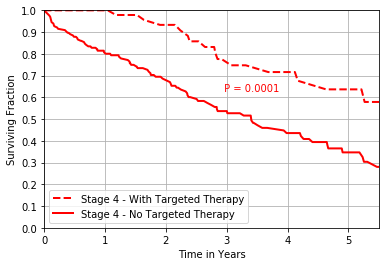

In [12]:
# C. Patient survival (stage 4 only) for breast patients that were prescribed targeted drug.
strin_group = 'targetdrugs'

groups='-2G'

survival_plot_2G_2DF(df_string = 'df_breast',string_eval = "&(df_breast['"+ strin_group +"']==False)",
                     label_string1 = 'Stage 4 - No targeted Therapy ',
                     df_string2 = 'df_breast', string_eval2="&(df_breast['"+ strin_group +"']==True)",label_string2 = 'Stage 4 - Whit Targeted Therapy ',title_string='Breast Cancer '+strin_group+groups,legend=False)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

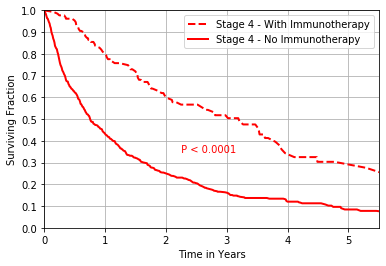

In [13]:
# C. Patient survival (stage 4 only) for lung cancer patients that were prescribed immunotherapy drugs.
strin_group = 'immunotherapy'

groups = '-2G'

survival_plot_2G_2DF(df_string = 'df_lung',string_eval = "&(df_lung['"+ strin_group +"']==False)",
                     label_string1 = 'Stage 4 - No Immunotherapy ',
                     df_string2 = 'df_lung', string_eval2="&(df_lung['"+ strin_group +"']==True)",label_string2 = 'Stage 4 - With Immunotherapy ',title_string='Lung Cancer '+strin_group+groups, legend=False,immu=True)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

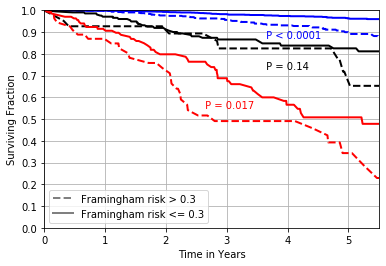

<Figure size 432x288 with 0 Axes>

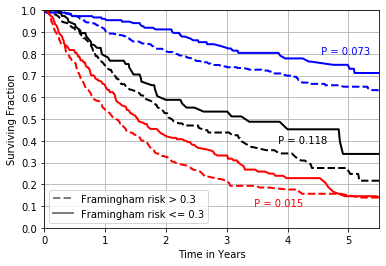

In [14]:
# D. Patient survival stratified by stage and for a computed Framingham risk score threshold of 0.3. 

strin_group = 'Framingham_risk'
risk_value = 0.3
string_eval_ = "']>"+str(risk_value)+")"
string_eval2_ = "']<="+str(risk_value)+")"


groups = '-3G'

survival_plot_3G_2DF(df_string = 'df_breast',string_eval = "&(df_breast['"+ strin_group +string_eval_,
                     label_string1 = 'F. risk > '+ str(risk_value) +" ",
                     df_string2 = 'df_breast', string_eval2="&(df_breast['"+ strin_group +string_eval2_,label_string2 = 'F. risk <= '+ str(risk_value) +" ",title_string='Breast Cancer '+ "Framingham risk", legend = False)

survival_plot_3G_2DF(df_string = 'df_lung',string_eval = "&(df_lung['"+ strin_group +string_eval_,
                     label_string1 = 'F. risk > '+ str(risk_value) +" ",
                     df_string2 = 'df_lung', string_eval2="&(df_lung['"+ strin_group +string_eval2_,label_string2 = 'F. risk <= '+ str(risk_value) +" ",title_string='Lung Cancer '+ "Framingham risk", legend = False,lung=True)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

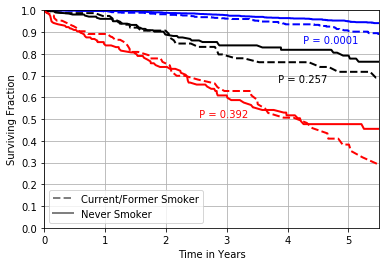

<Figure size 432x288 with 0 Axes>

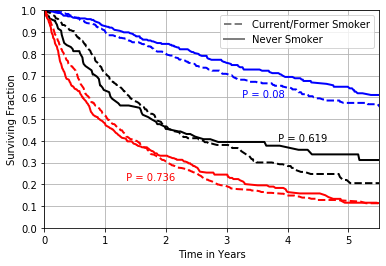

In [15]:
#E. Patient survival stratified by stage for patients with current or previous history of tobacco usage.

strin_group = 'Smoker'
string_eval_ = "']==False)"
string_eval2_ = "']==True)"
groups = '-3G'

survival_plot_3G_2DF_Smoker(df_string = 'df_breast',string_eval = "&(df_breast['"+ strin_group +string_eval_,
                            label_string1 = 'Never Smoker ',
                            df_string2 = 'df_breast', string_eval2="&(df_breast['"+ strin_group +string_eval2_,label_string2 = 'C/F Smoker ',title_string='Breast Cancer '+"Smoking history", legend = False)

survival_plot_3G_2DF_Smoker(df_string = 'df_lung',string_eval = "&(df_lung['"+ strin_group +string_eval_,
                            label_string1 = 'Never Smoker ',
                            df_string2 = 'df_lung', string_eval2="&(df_lung['"+ strin_group +string_eval2_,label_string2 = 'C/F Smoker ',title_string='Lung Cancer '+ "Smoking history", legend = False,lung= True)

